In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv("CO2_dataset.csv", encoding='latin1')

In [35]:
country_groups = df.groupby(["Country"])
countries = {}

In [36]:
for name, _ in country_groups:
    countries[name] = country_groups.get_group(name)
Co2_per_country = []
length_check  = []
country_index = {}
k = 0
Co2_per_country = np.zeros((len(countries.keys()), len(countries["Afghanistan"]['CO2 emission (Tons)'])))
print(Co2_per_country.shape)
for key in countries.keys():
    country_index[key] = k
    Co2_per_country[k] = countries[key]['CO2 emission (Tons)'].to_numpy()
    k += 1

Index(['Country', 'Code', 'Calling Code', 'Year', 'CO2 emission (Tons)',
       'Population(2022)', 'Area', '% of World', 'Density(km2)'],
      dtype='object')
(220, 271)


/var/folders/87/fylw6rqx7cz0vrk0z9cdsbhh0000gn/T/ipykernel_16322/1576470080.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, _ in country_groups:


In [37]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=4)

In [38]:
k_means.fit(Co2_per_country)

KMeans(n_clusters=4)

In [56]:
labels = []
for key, item in country_index.items():
    labels.append((key, k_means.labels_[item], countries[key]['CO2 emission (Tons)'].sum()))



In [57]:
label_0 = []
label_1 = []
label_2 = []
label_3 = []
label_0_names = []
label_1_names = []
label_2_names = []
label_3_names = []

for label in labels:
    match label[1]:
        case 0:
            label_0.append(label)
        case 1:
            label_1.append(label)
        case 2:
            label_2.append(label)
        case 3:
            label_3.append(label)

In [82]:
label_0_names = []
label_1_names = []
label_2_names = []
label_3_names = []

for label in label_0:
    label_0_names.append(label[0])
for label in label_1:
    label_1_names.append(label[0])
for label in label_2:
    label_2_names.append(label[0])
for label in label_3:
    label_3_names.append(label[0])


In [99]:
all_0 = df.loc[df["Country"].isin(label_0_names)]
all_1 = df.loc[df["Country"].isin(label_1_names)]
all_2 = df.loc[df["Country"].isin(label_2_names)]
all_3 = df.loc[df["Country"].isin(label_3_names)]

In [104]:
pop_dev_0 = all_0["Population(2022)"].std()
pop_max_0 = all_0["Population(2022)"].max()
pop_max_0
pop_min_0 = all_0["Population(2022)"].min()

In [90]:
all_0_Co2 = all_0.drop(all_0.columns.difference(["Year", "CO2 emission (Tons)"]), axis=1)
all_1_Co2 = all_1.drop(all_1.columns.difference(["Year", "CO2 emission (Tons)"]), axis=1)
all_2_Co2 = all_2.drop(all_2.columns.difference(["Year", "CO2 emission (Tons)"]), axis=1)
all_3_Co2 = all_3.drop(all_3.columns.difference(["Year", "CO2 emission (Tons)"]), axis=1)

In [91]:
all_0_Co2 = all_0.groupby("Year").mean().reset_index()
all_1_Co2 = all_1.groupby("Year").mean().reset_index()
all_2_Co2 = all_2.groupby("Year").mean().reset_index()
all_3_Co2 = all_3.groupby("Year").mean().reset_index()

In [59]:
df_0 = pd.DataFrame(label_0, columns=["Country", "Label", "Mean Co2"])
df_1 = pd.DataFrame(label_1, columns=["Country", "Label", "Mean Co2"])
df_2 = pd.DataFrame(label_2, columns=["Country", "Label", "Mean Co2"])
df_3 = pd.DataFrame(label_3, columns=["Country", "Label", "Mean Co2"])

In [60]:
x_axis = [0, 1, 2, 3]
y_axis = [df_0["Mean Co2"].mean(), df_1["Mean Co2"].mean(), df_2["Mean Co2"].mean(), df_3["Mean Co2"].mean()]

19068767447823.0
         Country  Label      Mean Co2
0  United States      1  1.906877e+13
          Country  Label      Mean Co2
0           China      2  4.162896e+12
1         Germany      2  5.300531e+12
2          Russia      2  4.080739e+12
3  United Kingdom      2  6.162082e+12
  Country  Label      Mean Co2
0  Canada      3  1.255512e+12
1  France      3  2.238247e+12
2   India      3  1.089952e+12
3   Italy      3  8.342234e+11
4   Japan      3  2.051064e+12


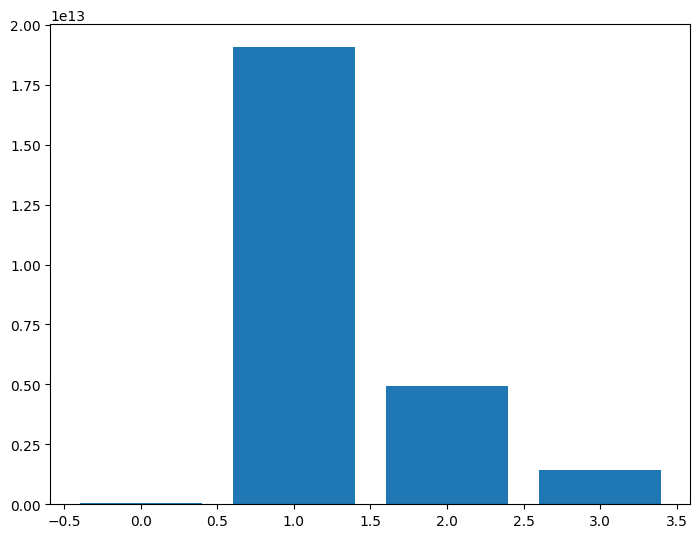

In [62]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_axis, y_axis)

print(y_axis[1])

print(df_1.head())
print(df_2.head())
print(df_3.head())

In [63]:
countries["United States"].head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
56910,United States,US,1,1750,0.0,338289857.0,9372610.0,6.10%,36/km²
56911,United States,US,1,1751,0.0,338289857.0,9372610.0,6.10%,36/km²
56912,United States,US,1,1752,0.0,338289857.0,9372610.0,6.10%,36/km²
56913,United States,US,1,1753,0.0,338289857.0,9372610.0,6.10%,36/km²
56914,United States,US,1,1754,0.0,338289857.0,9372610.0,6.10%,36/km²


Text(0, 0.5, 'Co2 Emissions (Tons)')

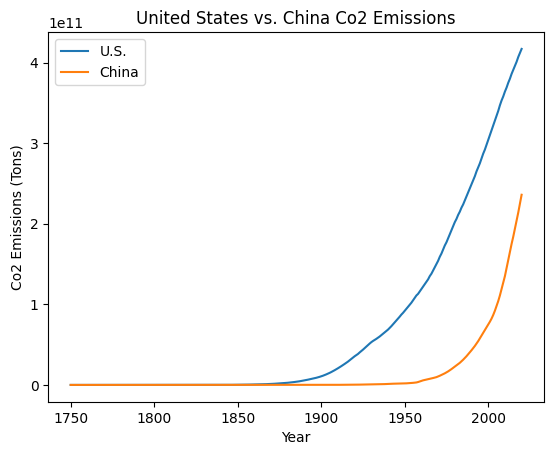

In [70]:
plt.plot(countries["United States"]["Year"], countries["United States"]["CO2 emission (Tons)"], label="U.S.")
plt.plot(countries["China"]["Year"], countries["China"]["CO2 emission (Tons)"], label="China")
plt.title("United States vs. China Co2 Emissions")
plt.legend()
plt.legend
plt.xlabel("Year")
plt.ylabel("Co2 Emissions (Tons)")

In [74]:
len(countries["United States"]["CO2 emission (Tons)"])

271

In [80]:
countries["United States"]["Year"].to_numpy()[-1]

2020

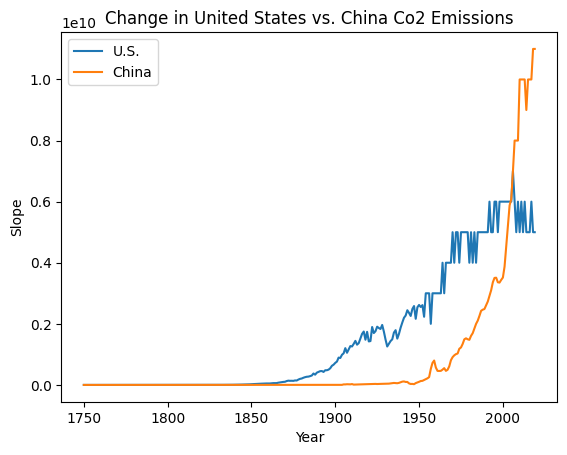

In [92]:
#Differential 

US_np = countries["United States"]["CO2 emission (Tons)"].to_numpy()
CH_np = countries["China"]["CO2 emission (Tons)"].to_numpy()

US_dy = np.diff(US_np)
CH_dy = np.diff(CH_np)

plt.plot(countries["United States"]["Year"].to_numpy()[:270], US_dy, label="U.S.")
plt.plot(countries["China"]["Year"].to_numpy()[:270], CH_dy, label="China")
plt.title("Change in United States vs. China Co2 Emissions")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Slope")
plt.show()

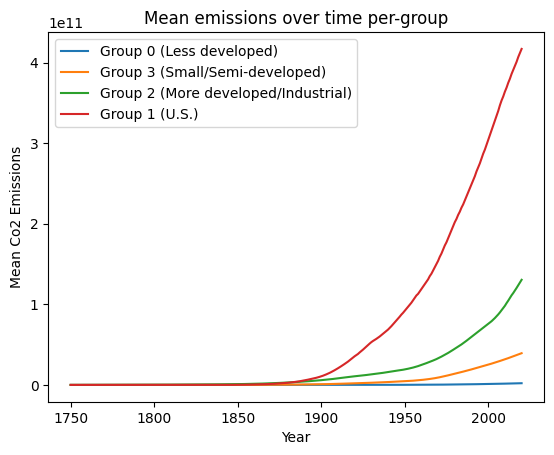

In [94]:
plt.plot(all_0_Co2["Year"], all_0_Co2["CO2 emission (Tons)"], label="Group 0 (Less developed)")
plt.plot(all_3_Co2["Year"], all_3_Co2["CO2 emission (Tons)"], label="Group 3 (Small/Semi-developed)")
plt.plot(all_2_Co2["Year"], all_2_Co2["CO2 emission (Tons)"], label="Group 2 (More developed)")
plt.plot(all_1_Co2["Year"], all_1_Co2["CO2 emission (Tons)"], label="Group 1 (U.S.)")
plt.title("Mean emissions over time per-group")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Mean Co2 Emissions")
plt.show()

In [98]:
all_0["CO2 emission (Tons)"].tail()

266    1.898843e+09
267    1.953186e+09
268    2.007629e+09
269    2.062564e+09
270    2.114336e+09
Name: CO2 emission (Tons), dtype: float64

/var/folders/87/fylw6rqx7cz0vrk0z9cdsbhh0000gn/T/ipykernel_16322/790745298.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_pop.set_xticklabels(x, rotation=90, fontsize=0)


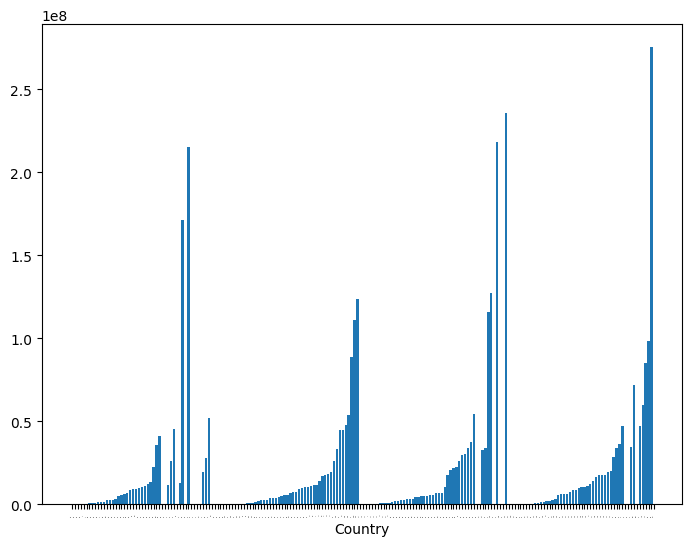

In [127]:
x = []
y = []
x_y = []

fig_pop = plt.figure()
ax_pop = fig_pop.add_axes([0,0,1,1])
for name, group in all_0.groupby("Code"):
    x_y.append((name, group["Population(2022)"].mean()))

x_y = sorted(x_y, key=lambda x: x[1])
for i in x_y:
    x.append(i[0])
    y.append(i[1])
for i in range(len(x)):
    if i == "nan":
        x[i] = 0
x = sorted(x)
ax_pop.bar(x,y)
fig_pop.autofmt_xdate()
ax_pop.set_xticklabels(x, rotation=90, fontsize=0)
plt.xlabel("Country")
plt.show()